# Sensor Object Testing and Visualization

This notebook demonstrates the instantiation and basic usage of `Sensor` objects within 
the Universal Sensing ETM (USETM) framework. After loading raw sensor data (temperature, 
u-wind, and v-wind) into DataFrames using the `DataLoader`, we now:

1. **Create `Sensor` Objects:**  
   Each `Sensor` encapsulates data and behaviors for one variable type, making it straightforward 
   to perform common tasks like filtering data by time or computing basic statistics.

2. **Filter and Analyze Data:**  
   We apply time-based filters to each sensor’s dataset, extract key subsets of interest, 
   and print out computed statistics (mean, min, max, standard deviation, count).

3. **Visualize Sensor Data Over Time:**  
   Using Matplotlib, we plot each sensor’s values, enabling quick visual inspection of 
   trends, variability, and patterns in the dataset.

This process sets a foundation for more complex operations in the USETM workflow, 
such as applying universal encoding, integrating the Extended Turing Machine, and 
ultimately comparing ETM-based data processing to non-ETM approaches.


In [5]:
# Step 1: Import necessary libraries and classes
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
from datetime import datetime
from src.sensors.sensor import Sensor

# If you have a relative import structure, make sure your notebook can see src directory
# For example:
import sys
sys.path.append("../")  # Adjust this as needed so Python can find your src directory

from src.data_handling.data_loader import DataLoader

# Step 2: Define your data directory and file groups (adjust paths as needed)
data_dir = "../data/NetCDF"
file_groups = {
    "temperature": ["April-30-temp.nc", "May-01-temp.nc", "May-02-temp.nc", "May-03-temp.nc"],
    "u_wind": ["April-30-u-wind.nc", "May-01-u-wind.nc", "May-02-u-wind.nc", "May-03-u-wind.nc"],
    "v_wind": ["April-30-v-wind.nc", "May-01-v-wind.nc", "May-02-v-wind.nc", "May-03-v-wind.nc"]
}

# Step 3: Use the DataLoader to load all DataFrames
loader = DataLoader(data_dir=data_dir)
data_dict = loader.load_all(file_groups)

# data_dict now contains DataFrames for temperature, u_wind, v_wind
temperature_df = data_dict["temperature"]
u_wind_df = data_dict["u_wind"]
v_wind_df = data_dict["v_wind"]


Loading and combining Temperature files...
Loading temperature data from: ../data/NetCDF/April-30-temp.nc
Loading temperature data from: ../data/NetCDF/May-01-temp.nc
Loading temperature data from: ../data/NetCDF/May-02-temp.nc
Loading temperature data from: ../data/NetCDF/May-03-temp.nc

Loading and combining U_wind files...
Loading u_wind data from: ../data/NetCDF/April-30-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-01-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-02-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-03-u-wind.nc

Loading and combining V_wind files...
Loading v_wind data from: ../data/NetCDF/April-30-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-01-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-02-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-03-v-wind.nc


=== Temperature Sensor Analysis ===
All temperature data:


,valid_time,latitude,longitude,number,expver,value,variable
0,2016-04-30,57.35,-112.05,0,0001,290.940430,temperature
1,2016-04-30,57.35,-111.95,0,0001,291.649963,temperature
2,2016-04-30,57.35,-111.85,0,0001,291.912292,temperature
3,2016-04-30,57.35,-111.75,0,0001,292.269775,temperature
4,2016-04-30,57.35,-111.65,0,0001,292.318542,temperature



Filtered temperature data between 2021-04-30 00:00:00 and 2021-05-01 23:59:00:


,valid_time,latitude,longitude,number,expver,value,variable



Temperature Statistics:
Mean: 288.7325744628906
Min: 275.7518310546875
Max: 303.3233642578125
Std: 6.250360012054443
Count: 18816.0


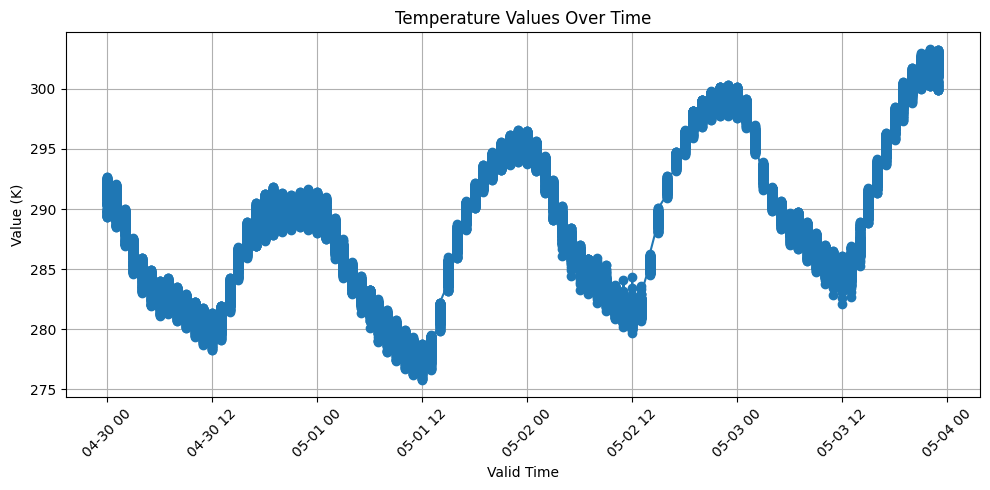


=== U-Wind Sensor Analysis ===
All u_wind data:


,valid_time,latitude,longitude,number,expver,value,variable
0,2016-04-30,57.35,-112.05,0,0001,0.412813,u_wind
1,2016-04-30,57.35,-111.95,0,0001,0.368807,u_wind
2,2016-04-30,57.35,-111.85,0,0001,0.327853,u_wind
3,2016-04-30,57.35,-111.75,0,0001,0.280917,u_wind
4,2016-04-30,57.35,-111.65,0,0001,0.239474,u_wind



Filtered u_wind data between 2021-04-30 00:00:00 and 2021-05-01 23:59:00:


,valid_time,latitude,longitude,number,expver,value,variable



U_Wind Statistics:
Mean: 0.7312585711479187
Min: -2.7002010345458984
Max: 3.3440284729003906
Std: 1.2954996824264526
Count: 18816.0


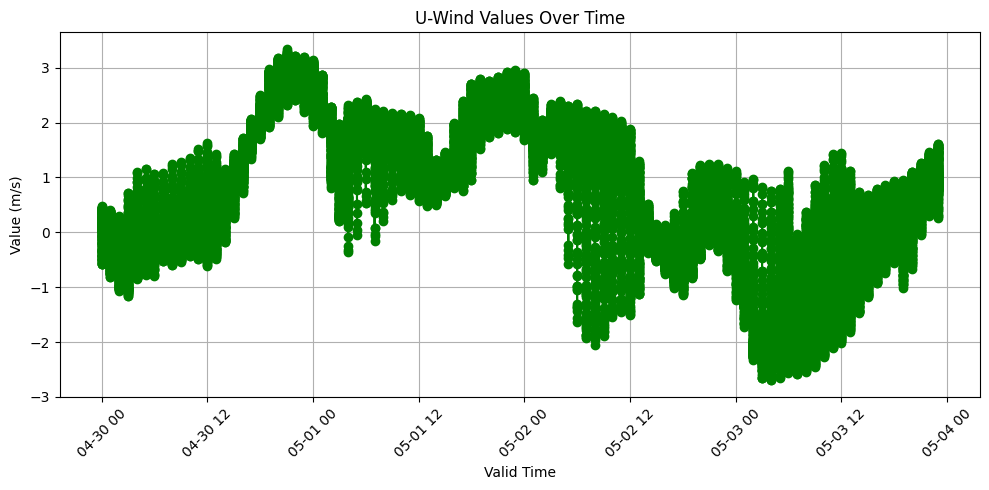


=== V-Wind Sensor Analysis ===
All v_wind data:


,valid_time,latitude,longitude,number,expver,value,variable
0,2016-04-30,57.35,-112.05,0,0001,3.472565,v_wind
1,2016-04-30,57.35,-111.95,0,0001,3.432495,v_wind
2,2016-04-30,57.35,-111.85,0,0001,3.403244,v_wind
3,2016-04-30,57.35,-111.75,0,0001,3.353394,v_wind
4,2016-04-30,57.35,-111.65,0,0001,3.323166,v_wind



Filtered v_wind data between 2021-04-30 00:00:00 and 2021-05-01 23:59:00:


,valid_time,latitude,longitude,number,expver,value,variable



V_Wind Statistics:
Mean: 1.3795137405395508
Min: -1.8595590591430664
Max: 4.074705123901367
Std: 1.0426679849624634
Count: 18816.0


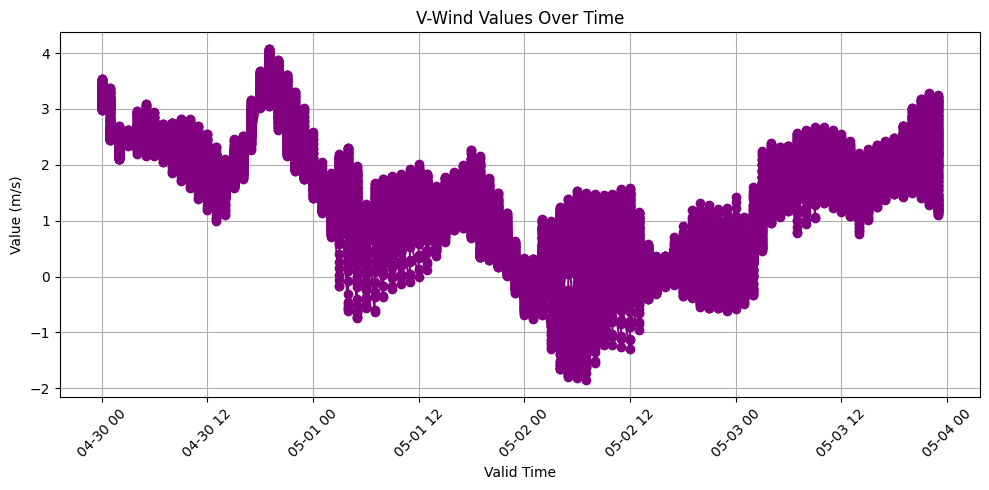

In [7]:
# Instantiate Sensor objects for each variable
temperature_sensor = Sensor("temperature", temperature_df)
u_wind_sensor = Sensor("u_wind", u_wind_df)
v_wind_sensor = Sensor("v_wind", v_wind_df)

# Common time filtering range (adjust dates as needed)
start_time = datetime(2021, 4, 30, 0, 0)
end_time = datetime(2021, 5, 1, 23, 59)

# --- Temperature Sensor Analysis ---
print("=== Temperature Sensor Analysis ===")
temp_data_all = temperature_sensor.get_data()
print("All temperature data:")
display(temp_data_all.head())

filtered_temp = temperature_sensor.filter_by_time(start_time, end_time)
print(f"\nFiltered temperature data between {start_time} and {end_time}:")
display(filtered_temp.head())

temp_stats = temperature_sensor.calculate_statistics()
print("\nTemperature Statistics:")
for k, v in temp_stats.items():
    print(f"{k.capitalize()}: {v}")

plt.figure(figsize=(10, 5))
plt.plot(temp_data_all['valid_time'], temp_data_all['value'], marker='o', linestyle='-', label="Temperature")
plt.title("Temperature Values Over Time")
plt.xlabel("Valid Time")
plt.ylabel("Value (K)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- U-Wind Sensor Analysis ---
print("\n=== U-Wind Sensor Analysis ===")
u_wind_data_all = u_wind_sensor.get_data()
print("All u_wind data:")
display(u_wind_data_all.head())

filtered_u_wind = u_wind_sensor.filter_by_time(start_time, end_time)
print(f"\nFiltered u_wind data between {start_time} and {end_time}:")
display(filtered_u_wind.head())

u_wind_stats = u_wind_sensor.calculate_statistics()
print("\nU_Wind Statistics:")
for k, v in u_wind_stats.items():
    print(f"{k.capitalize()}: {v}")

plt.figure(figsize=(10, 5))
plt.plot(u_wind_data_all['valid_time'], u_wind_data_all['value'], marker='o', linestyle='-', color='green', label="U-Wind")
plt.title("U-Wind Values Over Time")
plt.xlabel("Valid Time")
plt.ylabel("Value (m/s)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- V-Wind Sensor Analysis ---
print("\n=== V-Wind Sensor Analysis ===")
v_wind_data_all = v_wind_sensor.get_data()
print("All v_wind data:")
display(v_wind_data_all.head())

filtered_v_wind = v_wind_sensor.filter_by_time(start_time, end_time)
print(f"\nFiltered v_wind data between {start_time} and {end_time}:")
display(filtered_v_wind.head())

v_wind_stats = v_wind_sensor.calculate_statistics()
print("\nV_Wind Statistics:")
for k, v in v_wind_stats.items():
    print(f"{k.capitalize()}: {v}")

plt.figure(figsize=(10, 5))
plt.plot(v_wind_data_all['valid_time'], v_wind_data_all['value'], marker='o', linestyle='-', color='purple', label="V-Wind")
plt.title("V-Wind Values Over Time")
plt.xlabel("Valid Time")
plt.ylabel("Value (m/s)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
